<a href="https://colab.research.google.com/github/madhurchouhan01/Dog-Vs-Cat-Classification/blob/main/Dog_Vs_Cat_Classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:08<00:00, 158MB/s]
100% 812M/812M [00:08<00:00, 102MB/s]


In [11]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [12]:
from zipfile import ZipFile
dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [13]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('Files present: ',file_count)

Files present:  25000


In [14]:
file_name=os.listdir('/content/train')
print(file_name)

['dog.9649.jpg', 'cat.9055.jpg', 'dog.8468.jpg', 'cat.2357.jpg', 'dog.2924.jpg', 'dog.8471.jpg', 'dog.1971.jpg', 'cat.3929.jpg', 'cat.11410.jpg', 'cat.7717.jpg', 'cat.5050.jpg', 'cat.8254.jpg', 'dog.8625.jpg', 'dog.6890.jpg', 'dog.1229.jpg', 'cat.11359.jpg', 'cat.11408.jpg', 'dog.10644.jpg', 'cat.8976.jpg', 'cat.3474.jpg', 'dog.3847.jpg', 'dog.11023.jpg', 'dog.1409.jpg', 'cat.12223.jpg', 'dog.10276.jpg', 'cat.6611.jpg', 'dog.5804.jpg', 'dog.11059.jpg', 'dog.11991.jpg', 'dog.8248.jpg', 'dog.3309.jpg', 'dog.1730.jpg', 'cat.6997.jpg', 'dog.1445.jpg', 'cat.6299.jpg', 'cat.11867.jpg', 'cat.4575.jpg', 'dog.11392.jpg', 'dog.6574.jpg', 'cat.5061.jpg', 'cat.2881.jpg', 'dog.10700.jpg', 'dog.3071.jpg', 'cat.11004.jpg', 'dog.9425.jpg', 'dog.903.jpg', 'dog.10470.jpg', 'cat.12070.jpg', 'dog.8816.jpg', 'cat.2554.jpg', 'cat.9940.jpg', 'dog.6572.jpg', 'dog.3928.jpg', 'cat.2551.jpg', 'dog.11729.jpg', 'cat.4000.jpg', 'dog.3843.jpg', 'cat.9220.jpg', 'cat.7388.jpg', 'dog.2185.jpg', 'cat.12225.jpg', 'dog.89

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

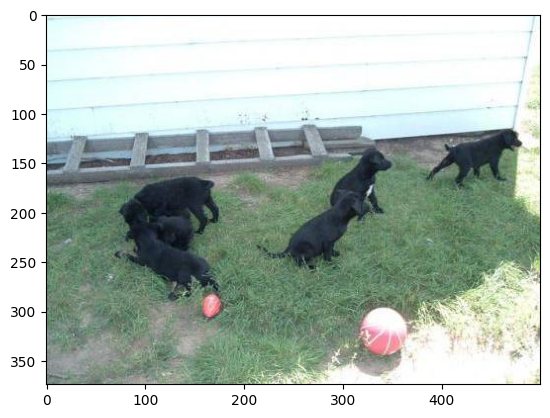

In [16]:
img=mpimg.imread('/content/train/dog.5315.jpg')
plt.imshow(img)

In [17]:
cat_count,dog_count=0,0
for name in file_name:
  cat_name=name[:3]
  if cat_name=='cat':
    cat_count+=1
  else:
    dog_count+=1
print('Cat',cat_count)
print('Dog',dog_count)

Cat 12500
Dog 12500


In [18]:
os.mkdir('/content/train_resized/')


In [21]:
original_folder='/content/train/'
resized_folder='/content/train_resized/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)
print('saved')

saved


In [23]:
filenames=os.listdir('/content/train_resized')
labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)
print(labels)

[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 

In [24]:
file_name=os.listdir('/content/train_resized/')

values,count=np.unique(labels, return_counts=True)
print(values)
print(count)

[0 1]
[ 990 1010]


In [25]:
import cv2
import glob

In [27]:
image_dir='/content/train_resized/'
image_extension=['png','jpg']
files=[]`

[files.extend(glob.glob(image_dir+'*.'+ e)) for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [28]:
X = dog_cat_images
Y = np.asarray(labels)

In [29]:
X_train,X_test,Y_train,Y_test=  train_test_split(X,Y,test_size=0.2,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
X_train_scale=X_train/255
X_test_scale=X_test/255
print(X_train_scale)
print(X_test_scale)

In [35]:
import tensorflow as tf
import tensorflow_hub as hub

In [38]:
mobilenet_model='https://www.kaggle.com/models/google/mobilenet-v2/frameworks/tensorFlow2/variations/tf2-preview-feature-vector/versions/4?tfhub-redirect=true'

pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [43]:
num_of_classes=2
model=tf.keras.Sequential(
    [
        pretrained_model,
        tf.keras.layers.Dense(num_of_classes)
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [46]:
model.fit(X_train_scale,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 73s 1s/step - loss: 0.2252 - acc: 0.9056
Epoch 2/5
50/50 [==============================] - 82s 2s/step - loss: 0.0629 - acc: 0.9825
Epoch 3/5
50/50 [==============================] - 90s 2s/step - loss: 0.0455 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.0355 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 72s 1s/step - loss: 0.0274 - acc: 0.9950


In [47]:
score,acc=model.evaluate(X_test_scale,Y_test)
print(score)
print(acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0686 - acc: 0.9800
0.06855593621730804
0.9800000190734863


Path of the image to be predicted: /content/cat.png


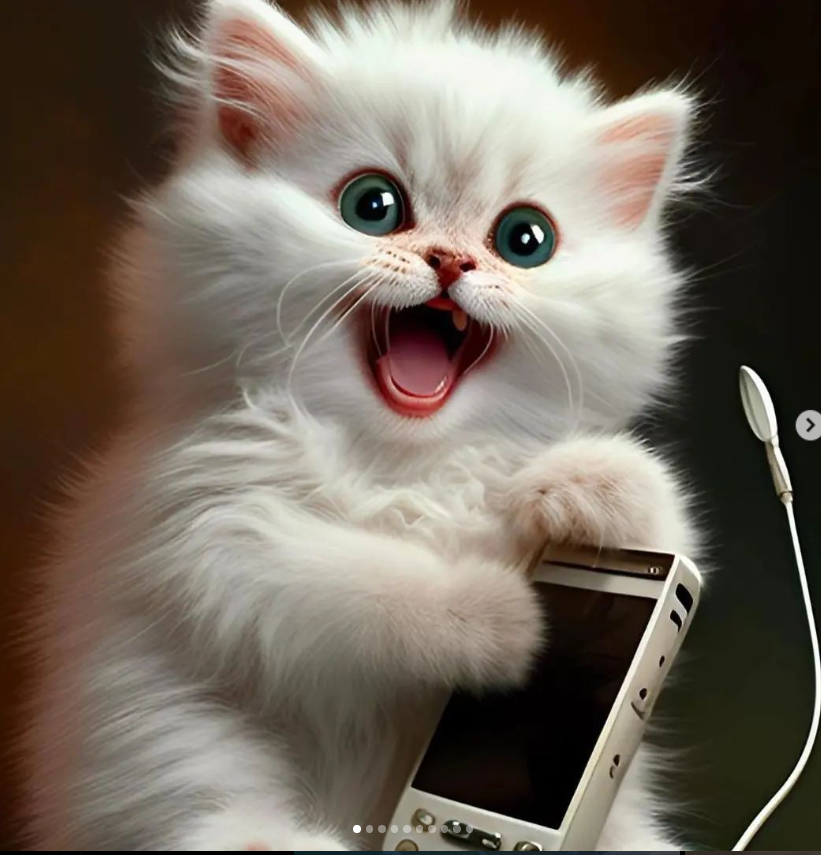

1/1 [==============================] - 1s 651ms/step
[[ 5.265243  -2.4302247]]
0
The image represents a Cat


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.png


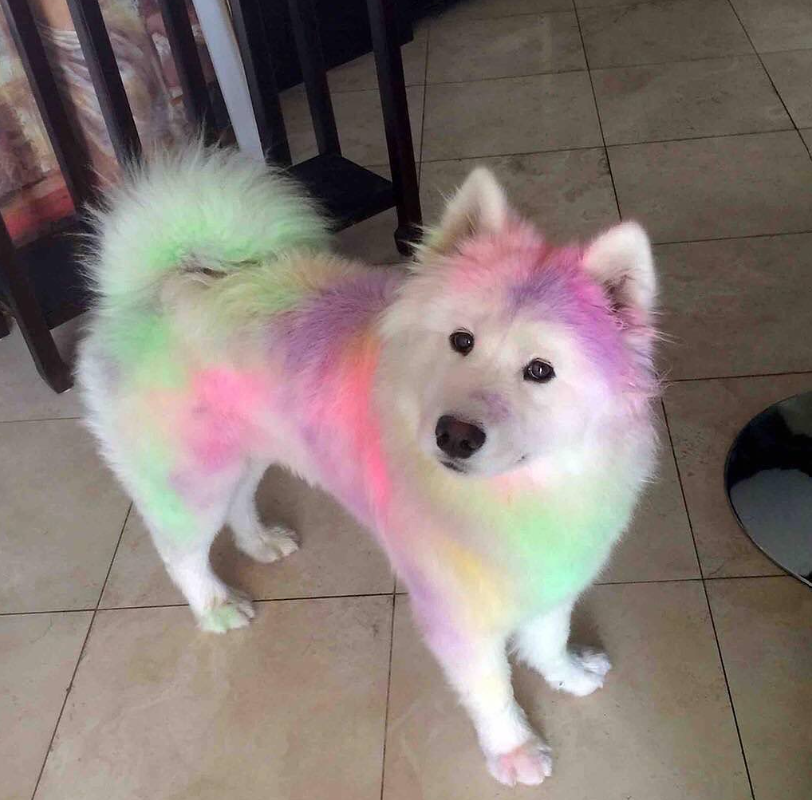

1/1 [==============================] - 0s 76ms/step
[[-0.71649295  2.0827792 ]]
1
The image represents a Dog


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [52]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.6 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=55

In [53]:
import gradio as gr
def predict_image(input_image):
    input_image_resized = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resized / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])


    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)


    if input_pred_label == 0:
        prediction_text = 'The image represents a Cat'
    else:
        prediction_text = 'The image represents a Dog'

    return prediction_text


gr.Interface(predict_image,
              inputs="image",
              outputs="text",
              title="Cat vs. Dog Classifier",
              description="Upload an image to predict whether it's a cat or a dog.").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://452b94ecf1ad82fd42.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
